# Applied Econometrics - Seminar II: Introduction to Time Series Modeling
=======================================
##### Lenka Nechvátalová (`lenka.nechvatalova@fsv.cuni.cz`)

In [3]:
rm(list = ls())

#install.packages(c("tseries", "forecast"))

suppressPackageStartupMessages({
    library('tseries')   #Time Series Analysis and Computational Finance 
    library('forecast') #Forecasting Functions for Time Series and Linear Models 
    library('repr')     #Serializable Representations 
})


Warning message:
"package 'tseries' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"

<a id='Contents'></a> 
## Contents

- [Stationarity](#Stationarity)
    - [Why is it important?](#Whyisitimportant?)
    - [Weakly Stationary](#WeaklyStationary)
    - [Example 1 - Simulated data](#Example1)
- [Testing for stationarity](#TestingforStationarity)
    - [Autocorrelation Function (ACF) and Partial Autocorrelation function (PACF)](#ACFandPACF)
    - [Example 2 - Compare Stationary and Non-Stationary series](#Example2)
    - [Dickey-Fuller Tests for Stationarity](#DickeyFullerTestforStationarity)
    - [Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test](#KPSS)
    - [Transformations to achive stationarity](#transformations)
    - [Example 3 - CZK/EUR exchange rate example](#Example3)
    - [Example 4. Real Data - PX50 index](#Example4)
- [Appendix](#Appendix)
    - [Additional Resources](#OptionalResources)
    - [Two ways of generating Random Walk](#RandomWalk)
    

##### BOOK 
[Brooks, C. Introductory Econometrics for Finance, Cambrige University Press.](https://drive.google.com/file/d/1fJ3O5rf-NFjwiJ0ptk1h91MKbCUb24xo/view?usp=sharing)

# Stationarity 
<a id='Stationarity'></a> 

## __Why is it important?__
<a id='Whyisitimportant?'></a> 


In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the _way_ it changes does not itself change over time. 

-  stationary processes are easier to analyze. 
-  stationary processes should be possible to predict, as the way they change is predictable.

-  non-stationarities can strongly influence series, its behavior, and properties.
    - persistence of shocks might be infinite
    - _spurious regressions and correlation_: 2 trending variables over time which are unrelated will have high $R^2$ or correlation coefficient; see http://www.tylervigen.com/spurious-correlations.
    - assumptions for asymptotic analysis is not valid for non-stationary series (we can not test hypotheses validly)

## Weak Stationarity (covariance stationarity)
<a id='Weakly Stationary'></a> 

We have time series $y_t = (y_1, y_2, \dots, y_T)$

<font color='blue'>Weakly Stationary</font> process should have a constant mean, a constant variance and a constant autocovariance structure, respectively: 


$$
\begin{align}
& \mu_t = \mathbb{E}(y_t) = \mu < \infty \nonumber \\
& Var(y_t) =  \mathbb{E}[(y_t - \mu)^2] = \sigma^2 < \infty \nonumber \\
& Cov(y_t, y_{t-k}) = \mathbb{E}[(y_{t} - \mu_t) (y_{t-k} - \mu_{t-k})] = \gamma_{k} \quad  \forall t_1, t_2 \nonumber
\end{align} 
$$

The <font color='blue'>_autocovariances_</font>  determine how $y$ is related to its previous values, and for a stationary series they depend only on the difference between $t_1$ and $t_2$, so that the covariance between $y_t$ and $y_{t−1}$ is the same as the covariance between $y_{t−10}$ and $y_{t−11}$, etc. The moment
$$
\begin{align}
& E(y_{t} - E(y_{t})) E(y_{t-s} - E(y_{t-s}))= \gamma_{s}, \quad  s = 0, 1, 2... \nonumber
\end{align}
$$
is known as the autocovariance function.

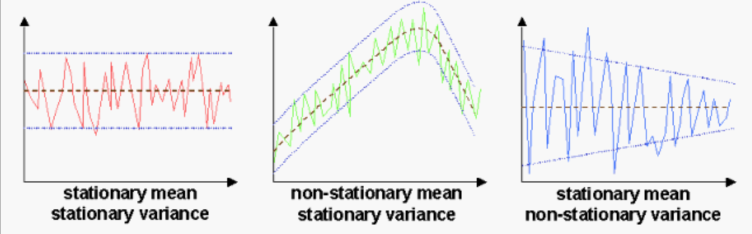


On the other hand, <font color='blue'>strict stationarity</font>  requires distribution of time series to be constant under time shift; weak stationarity, which is assumed more often, requires only fluctuation with constant variation around constant level. 

## Example 1. Simulated data and spurious regression
<a id='Example1'></a> 
This example investigates:
 - how the spurious correlations may emerge
 - how the _stochastic_ trend and _time_ trend may influence the _correlation_ between two time-series

### 1.1 Simulate Random Walk process

- Simulate two <font color='blue'>Random Walk</font>   processes and check their correlation coefficient:
$$ y_t = y_{t-1} + u_t $$
where $u_t$ is a Gaussian white noise, i.e. $u_t \sim i.i.d. N(0, \sigma^2)$

 
- Simulate 10000 repetitions of two <font color='blue'>Random Walk</font>  processes and check their correlation coefficient distribution. 

*RW is widely used model for log of stock price

Correlation between two random walks:  0.5015383

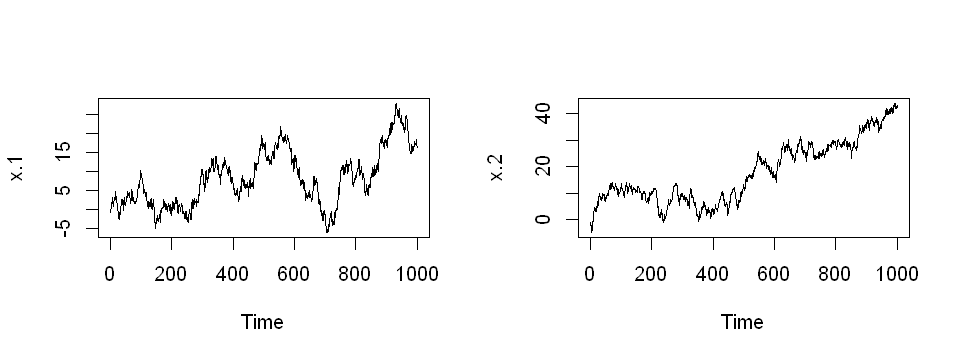

In [9]:
options(repr.plot.width=8, repr.plot.height=3) # set the plotting parameters   

set.seed(123)
#The set.seed() function sets the starting number used to generate a sequence of random numbers – 
#it ensures that you get the same result if you start with that same seed each time you run the same process. 

#generate Random Walk: 
x.1 <- cumsum(rnorm(1000))
x.2 <- cumsum(rnorm(1000))
#for why we can use cumsum see appendix below. 
par(mfrow=c(1,2))
ts.plot(x.1)
ts.plot(x.2)

cat('Correlation between two random walks: ',cor(x.1, x.2))

In [10]:
#spurious regression
summary(lm(x.1~x.2))


Call:
lm(formula = x.1 ~ x.2)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7193  -4.3469  -0.2624   5.2217  14.1622 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3850     0.3652    6.53 1.05e-10 ***
x.2           0.3168     0.0173   18.31  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.309 on 998 degrees of freedom
Multiple R-squared:  0.2515,	Adjusted R-squared:  0.2508 
F-statistic: 335.4 on 1 and 998 DF,  p-value: < 2.2e-16


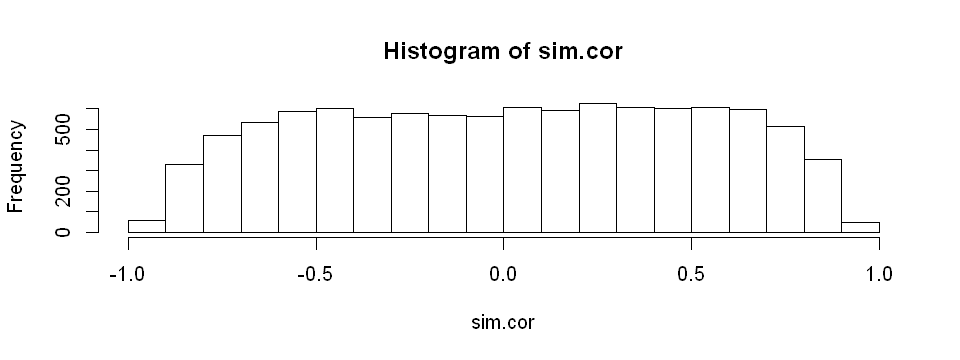

In [11]:
# histogram of correlations of two random walks 
set.seed(345)

n <- 10000 # number of simulations
sim.cor <- rep(NA, n)

for (i in 1:n) {
    x.1 <- cumsum(rnorm(1000))
    x.2 <- cumsum(rnorm(1000))
    sim.cor[i] <- cor(x.1, x.2)
}

hist(sim.cor)

<font color='red'>Note</font>: We can see that even though the mean value of the correlations is zero, there are many instances in which it is significantly different from zero. Thus there is a high probability of observing correlations far from zero between these random series that are not conceptually related.

-----------------------------------------------

### 1.2 Simulate Random Walk process with trend

- Simulate the data with time trend, i.e. random walk with constant:
$$
y_{t} = \mu t + y_{t-1} + u_t
$$
where $u_t$ is a Gaussian white noise, i.e. $u_t \sim i.i.d. N(0, \sigma^2)$

 
- Simulate 10000 repetitions of two <font color='blue'>Random Walk with trend</font>  processes and check their correlation coefficient distribution. 

Correlation between two random walks with common trend:  0.9736579

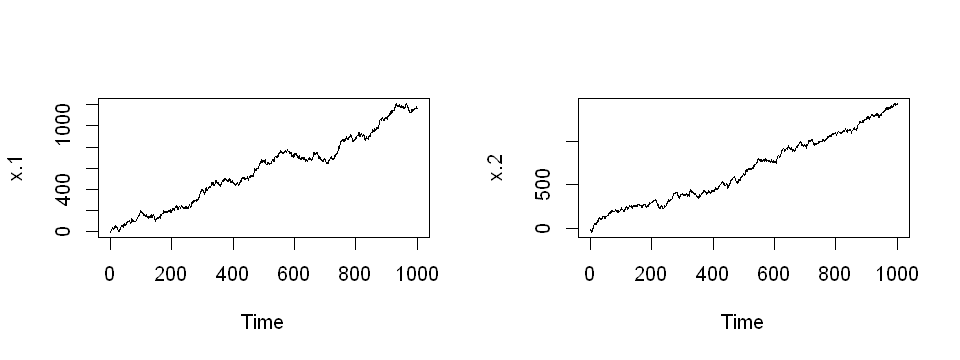

In [12]:
set.seed(123)
    mu <- 1
    time <- rep(mu, 1000)
#generate Random Walk with trend: 
    x.1 <- cumsum(rnorm(1000, 0, 10)) + cumsum(time) 
    x.2 <- cumsum(rnorm(1000, 0, 10)) + cumsum(time)

par(mfrow=c(1,2))
    ts.plot(x.1)
    ts.plot(x.2)

cat('Correlation between two random walks with common trend: ',cor(x.1, x.2))

In [13]:
#spurious regression
summary(lm(x.1~x.2))


Call:
lm(formula = x.1 ~ x.2)

Residuals:
     Min       1Q   Median       3Q      Max 
-185.365  -58.313   -3.905   62.495  186.001 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.66856    4.84110   3.237  0.00125 ** 
x.2          0.83371    0.00618 134.900  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 76.89 on 998 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.948 
F-statistic: 1.82e+04 on 1 and 998 DF,  p-value: < 2.2e-16


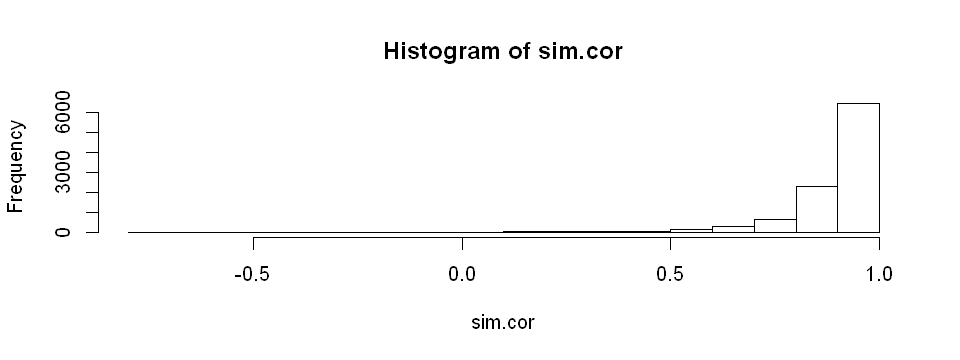

In [14]:
set.seed(345)

n <- 10000 # number of simulations
sim.cor <- rep(NA, n)

for (i in 1:n) {
    x.1 <- cumsum(rnorm(1000, 0, 10)) + cumsum(time) 
    x.2 <- cumsum(rnorm(1000, 0, 10)) + cumsum(time)
    sim.cor[i] <- cor(x.1, x.2)
}

hist(sim.cor)

-----------------------------------------------

### 1.3 Simulate data that are stationary.

- Simulate data of an __autoregressive process AR(1)__ of the form:
$$
y_t = \mu + \phi y_{t-1} + u_t
$$
where $u_t$ is a Gaussian white noise, i.e. $u_t \sim i.i.d. N(0, \sigma^2)$

 
- Simulate 10000 repetitions of two <font color='blue'>stationary</font>  processes and check their correlation coefficient distribution. 

Correlation between two AR(1) processes:  0.01837567

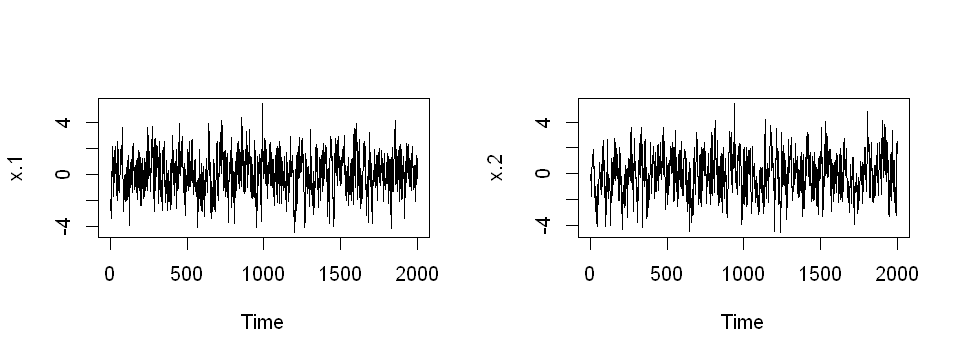

In [15]:
set.seed(123)
    x.1 <- arima.sim(model = list(ar = c(0.75)), n = 2000)
    x.2 <- arima.sim(model = list(ar = c(0.75)), n = 2000)
 par(mfrow=c(1,2))
    ts.plot(x.1)
    ts.plot(x.2)


cat('Correlation between two AR(1) processes: ',cor(x.1, x.2))

In [16]:
#not-spurious regression
summary(lm(x.1~x.2))


Call:
lm(formula = x.1 ~ x.2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4643 -0.9236  0.0293  0.9598  5.4422 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11336    0.03213   3.529 0.000427 ***
x.2          0.01734    0.02111   0.822 0.411452    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.435 on 1998 degrees of freedom
Multiple R-squared:  0.0003377,	Adjusted R-squared:  -0.0001627 
F-statistic: 0.6749 on 1 and 1998 DF,  p-value: 0.4115


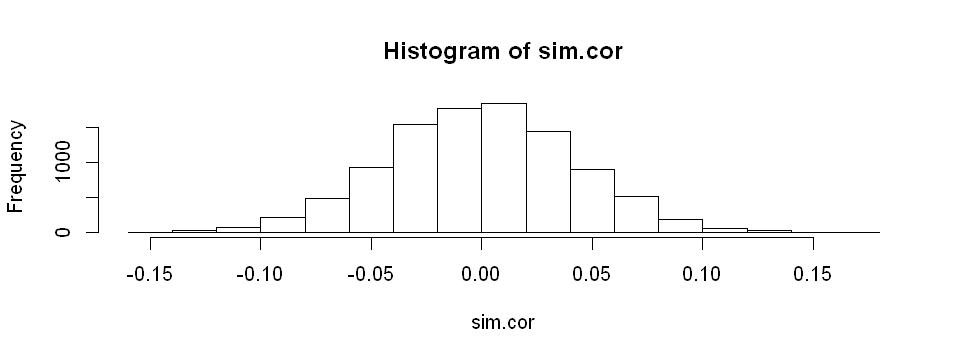

In [17]:
n <- 10000 # number of simulations
sim.cor <- rep(NA, n)

for (i in 1:n) {
    x.1 <- arima.sim(model = list(ar = c(0.75)), n = 2000)
    x.2 <- arima.sim(model = list(ar = c(0.75)), n = 2000)
    sim.cor[i] <- cor(x.1, x.2)
}

hist(sim.cor)

# Testing for Stationarity
<a id='TestingforStationarity'></a> 

- Visual assessment (informal): 
    - Plot time series
    - Correlograms: Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF)
        - ACF is close to one for all lags if the process contains unit root
- Statistical tests based on unit root testing: 
    - Dickey-Fuller test,
    - Augmented Dickey Fuller test, 
    - KPSS test

## Autocorrelation Function (ACF) and Partial Autocorrelation function (PACF)
<a id='ACFandPACF'></a>


Autocorrelation plots are a useful visual tool in determining whether a series is stationary. 

Autocorrelation (ACF) plots display the correlation between a series and its lags. The ACF is useful in determining the order of the MA model. 

Partial autocorrelation plots (PACF) display a correlation between a variable and its lags that are not explained by previous lags. The PACF is useful in determining the order of the AR model. 


#### Autocorrelation function (ACF)

- ACF is the proportion of the autocovariance of $y_t$ and $y_{t-k}$ to the variance of a dependent variable $y_t$
$$
ACF(k) = \rho_k = \frac{Cov(y_t, y_{t-k})}{Var(y_t)}
$$
- The autocorrelation function ACF($k$) gives the gross correlation between $y_t$ and $y_{t−k}$.
- For an AR(1) model, the ACF is $ACF(k) = \rho_k = \gamma^k$. We say that this function tails off.


#### Partial autocorrelation function (PACF)

- PACF is the sample correlation between $y_t$ and $y_{t-k}$ minus the part explained by the lags inbetween
$$
\rho_k^* = Corr[y_t - E^*(y_t|y_{t-1}, ... , y_{t-k+1}), y_{t-k}]
$$
where $E^*(y_t|y_{t-1}, ... , y_{t-k+1})$ is the minimum mean-squared error predictor of $y_t$ by $y_{t-1}, ... , y_{t-k+1}$. 
- For an AR(1) model, the PACF is $\gamma$ for the first lag and then cuts off.


#### An autoregressive (AR) process:         
- number of spikes of pacf = AR order  
- a geometrically decaying acf                

#### A moving average (MA) process: 
- Number of spikes of acf = MA order
- geometrically decaying pacf







|      |         AR($p$)        |         MA($q$)        | ARMA($p,q$) |
|------|:--------------------:|:--------------------:|:---------:|
| ACF  |       Tails off      | Cuts off after lag $q$ | Tails off |
| PACF | Cuts off after lag $p$ |       Tails off      | Tails off |

##  Example 2 - Compare Stationary and Non-Stationary series (ACF, PACF)
<a id='Example2'></a> 
- visual comparison of AR(1) process, MA(1) process and random walk process, their ACF and PACF

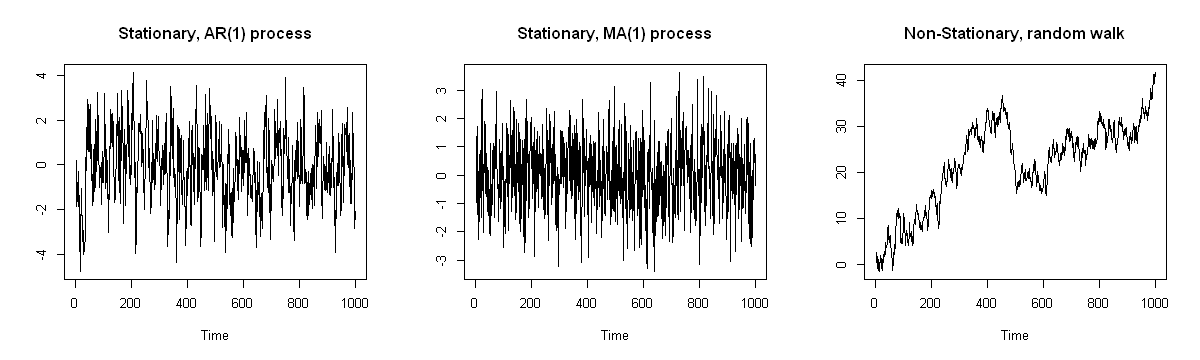

In [18]:
options(repr.plot.width=10, repr.plot.height=3) # set the plotting parameter
set.seed(1234)

x <- arima.sim(model = list(ar = c(0.75)), n = 1000)  # AR (1): y = 0.75 * y(t-1) + e(t)
y <- arima.sim(model = list(ma = c(0.75)), n = 1000)  # MA (1): y = 0.75 * e(t-1) + e(t)
z <- cumsum(rnorm(1000))  # x = x(t-1) + w(t)

par(mfrow=c(1,3))
    ts.plot(x, ylab='',main = 'Stationary, AR(1) process')
    ts.plot(y, ylab='',main = 'Stationary, MA(1) process')
    ts.plot(z, ylab='', main = 'Non-Stationary, random walk')

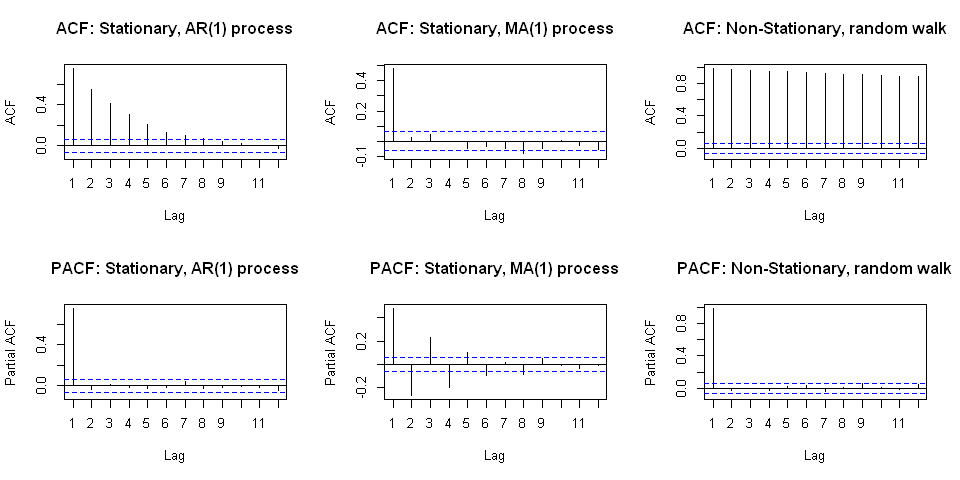

In [20]:
options(repr.plot.width=8, repr.plot.height=4) # set the plotting parameters
par(mfrow=c(2,3))
    Acf(x, lag.max = 12, main ='ACF: Stationary, AR(1) process')
    Acf(y, lag.max = 12, main="ACF: Stationary, MA(1) process")
    Acf(z, lag.max = 12, main="ACF: Non-Stationary, random walk")

    Pacf(x, lag.max = 12, main="PACF: Stationary, AR(1) process")
    Pacf(y, lag.max = 12, main="PACF: Stationary, MA(1) process")
    Pacf(z, lag.max = 12, main="PACF: Non-Stationary, random walk")

In [13]:
# ACF tells us the correlation, we can also see/plot the relationship of each observation and corresponding lagged observation

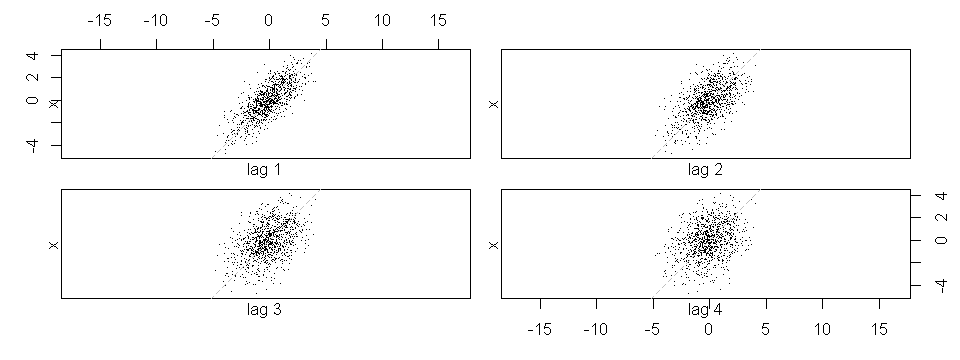

In [14]:
# plot the AR(1) process against its lags:
options(repr.plot.width=8, repr.plot.height=3) # set the plotting parameters
lag.plot(x, lags = 4, pch = ".")

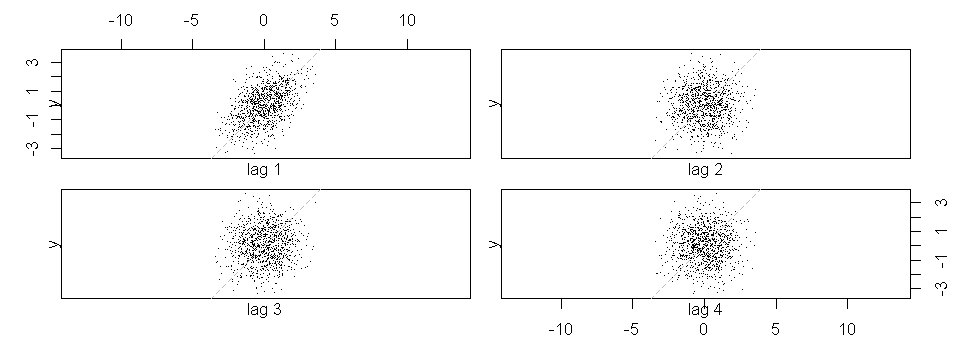

In [15]:
# plot the MA(1) process against its lags:
options(repr.plot.width=8, repr.plot.height=3) # set the plotting parameters
lag.plot(y, lags = 4, pch = ".")

According to the plot, we can see clearly a strong linear dependence between $y_{t-1}$ and $y_t$.

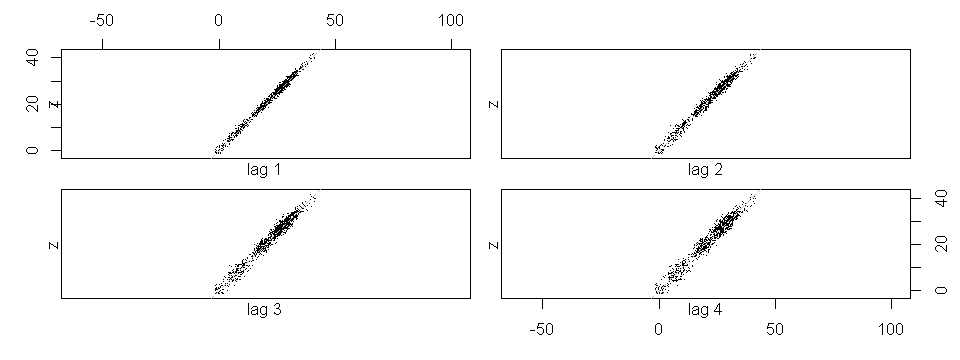

In [16]:
# plot the random walk against its lags:
lag.plot(z, lags = 4, pch = ".")

<font color='red'>Questions</font>:
- How does the ACF and PACF looks like for the white noise process?
- Simulate Gaussian white noise and check its ACF and PACF.

## Dickey-Fuller Tests for Stationarity
<a id='DickeyFullerTestforStationarity'></a> 

####  Dickey-Fuller test
- Assume an AR(1) process. The process is non-stationary and a unit root is present if $|\rho| = 1$.
$$
\begin{align}
 y_t = & \rho y_{t-1} + e_t  \nonumber \\
 y_t - y_{t-1} = & \rho y_{t-1} - y_{t-1} + e_t \nonumber \\
 \Delta y_t = & (\rho - 1) y_{t-1} + e_t = \gamma y_{t-1} + e_t \nonumber
\end{align}
$$

- We can estimate the above model and test for the significance of the $\gamma$ coefficient.
    - The null hypothesis $\gamma= 0$ (non-significant coefficient $\gamma$) means that $y_t$ is not stationary. Difference the variable (or transform it in another way) and repeat the Dickey-Fuller test to see if the transformed variable is stationary.
    - The alternative hypothesis $\gamma < 0$ (significant coefficient  $\gamma$) means that $y_t$ is stationary. We can use the time series.
    - Note that significance for  $\gamma$ means stationarity.
    

    
    
####  Augmented Dickey-Fuller test

- In addition to the model above, more lags, a drift $\mu$, and additional lags of the dependent variable can be added.
$$
\Delta y_{t}=\mu+\gamma^{*} y_{t-1}+\sum_{j=1}^{p-1} \phi_{j} \Delta y_{t-j}+\epsilon_{t}
$$
-The augmented Dickey-Fuller test evaluates the null hypothesis that $\gamma^* = 0$.  The model will be non-stationary if $\gamma^* = 0$. 

#### Dickey-Fuller test with a time trend
- The model with a time trend:
$$
\Delta y_{t}=\mu+\beta t+\gamma^{*} y_{t-1}+\sum_{j=1}^{p-1} \phi_{j} \Delta y_{t-j}+\epsilon_{t} 
$$
- Test the hypothesis that $\beta = 0$ and $\gamma^* = 0$. Again, the model will be non-stationary or will have a unit root present if $\gamma^* = 0$.

  

## Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test
<a id='KPSS'></a> 

Another widely used stationarity test is Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test. The null hypothesis for the KPSS test is that the data are stationary. For this test, we do NOT want to reject the null hypothesis. In other words, we want the p-value to be greater than 0.05 not less than 0.05.

- _H0_: stationarity
- _H1_: unit root


The KPSS test in r contains the following components:
- statistic -- the value of the test statistic.
- parameter--  the truncation lag parameter.
- p.value -- the p-value of the test.
- method --  a character string indicating what type of test was performed.
- data.name -- a character string giving the name of the data.

The **p-value** reported by the test is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.

The **KPSS statistic** is the actual test statistic that is computed while performing the test. For more information see the references mentioned at the end.

In order to **reject the null hypothesis**, the test statistic should be greater than the provided critical values. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value.

That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

Finally, the **number of lags** reported is the number of lags of the series that was actually used by the model equation of the kpss test. By default, the statsmodels kpss() uses the ‘legacy’ method. In legacy method, $int(12*(\frac{n}{100})^{\frac{1}{4}})$ number of lags is included, where $n$ is the length of the series.

## Transformations to achieve stationarity
<a id='transformations'></a> 

- detrending
- taking logarithm
- differencing
- log differencing (log returns)

**Order of integration** - 'denoted I(d), minimum number of differences required to obtain a weakly stationary (covariance-stationary) series.'

To **difference** a series $y_t$:

$  \Delta y_t = y_t - y_{t-1} $ 




For interpretation purposes, the original series is often stationarized using transformations into the __returns__. There are essentially __3 types of returns:__
- _simple gross returns:_
    - 1-period simple gross return:
    $$ G_t \equiv \frac{y_t}{y_{t-1}} $$
    - $k$-period simple gross return:
    $$ G_t [k] \equiv \frac{y_t}{y_{t-k}} $$
    - We can write:
    $$ G_t [k] = G_t \times G_{t-1} \times \ldots G_{t-k+1} $$
- _net gross returns:_
    - - 1-period simple net return:
    $$ R_t \equiv \frac{y_t}{y_{t-1}} - 1 = \frac{y_t - y_{t-1} }{y_{t-1}} = G_t -1 $$
    - $k$-period simple net return:
    $$ R_t [k] \equiv \frac{y_t}{y_{t-k}} - 1 =  \frac{y_t - y_{t-k} }{y_{t-1}} = G_{t}[k] - 1 $$
    - We can write:
    $$ R_t [k] = (1 + R_t) \times (1 + R_{t-1}) \times \ldots (1 + R_{t-k+1}) - 1 $$

- _log returns:_
    - 1-period log return:
    $$ r_t \equiv \ln (G_t) = \ln \Big( \frac{y_t}{y_{t-1}} \Big)$$
    - $k$-period log return:
    $$ r_t [k] \equiv \ln (G_t [k]) = \ln \Big( \frac{y_t}{y_{t-k}} \Big) $$
    - We can write:
    $$ r_t [k] = r_t + r_{t-1} + \ldots + r_{t-k+1} $$

_Interpretation of Log Returns:_

The Taylor expansion of $\ln (1 + x)$ for $|x| < 1$ is
$$ \ln (1 + x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \ldots $$
For $|x| \ll 1$ we can thus write
$$ \ln (1 + x) \approx x .$$
Therefore, for $|R_t| \ll 1$ and $|R_t [k]| \ll 1$ we can write
$$ r_t = \ln (1 + R_t) \approx R_t, \, r_t[k] = \ln (1 + R_t[k]) \approx R_t[k] .$$

Simple net returns can be interpreted as a percentage change of the price (level, etc.). So, log returns can be interpreted the same for small changes. Morevover, log returns posses many desirable statistical properties and are almost identical to simple net returns. So, in many applications the log returns are preferable to the net returns.

-------------------------------------------------

### How to choose the transformation?

- No precise guideline for that.
- In economics and finance, returns often times have better interpretation than differences.
- If not sure, look at the series and if the series exponentially grows, then use returns, if it grows linearly, choose differences.
- refer to relevant literature using the same (or similar) dataset.

As an example from the literature, regarding the transformation of exchange rate before estimation of the model: (Kearney, Patton 2005 - https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6288.2000.tb01405.x) 

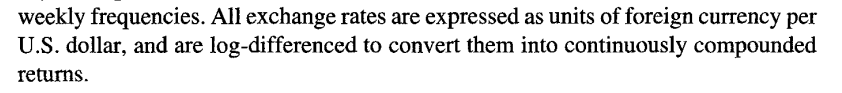

## Example 3. CZK/EUR exchange rate example - testing stationarity
<a id='Example3'></a> 

Let's now look at the real-world dataset. The data are CZK/EUR exchange rate around year 2008. 

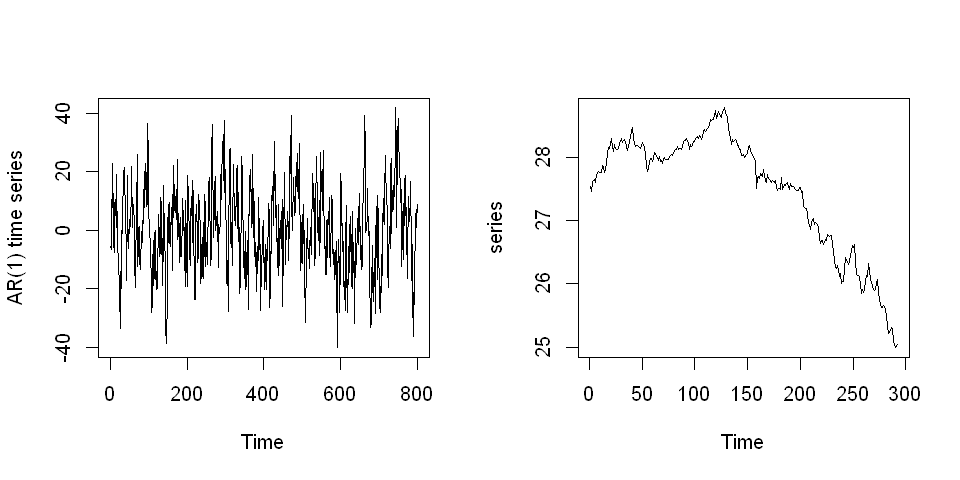

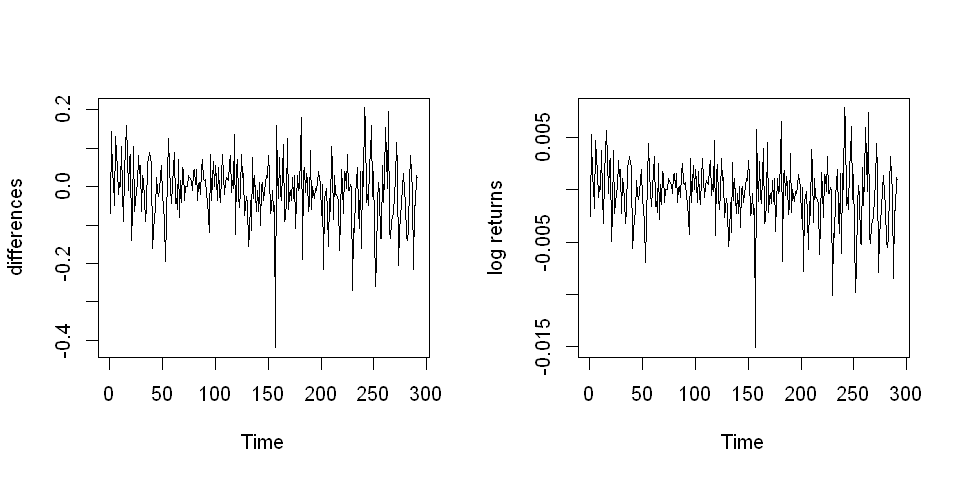

In [25]:
options(repr.plot.width=8, repr.plot.height=4)

# load the data
data <- read.table("CZK_EUR_2008.txt")
series <- as.matrix(data)
dif.series <- diff(series)
returns <- diff(log(series))

#lets compare with randomly generated AR(1) series. 
set.seed(123)
    TT <- 800
    xx <- ww <- rnorm(n = TT, mean = 0, sd = 10)
    for (t in 2:TT) {
        xx[t] <- 0.75*xx[t - 1] + ww[t]
    }

par(mfrow = c(1,2))
plot.ts(xx, ylab = "AR(1) time series")
plot.ts(series, ylab = "series")
par(mfrow = c(1,2))

plot.ts(dif.series, ylab = "differences")
plot.ts(returns, ylab = "log returns")

### Let's investigate the difference of the simple net returns and log returns of our data.

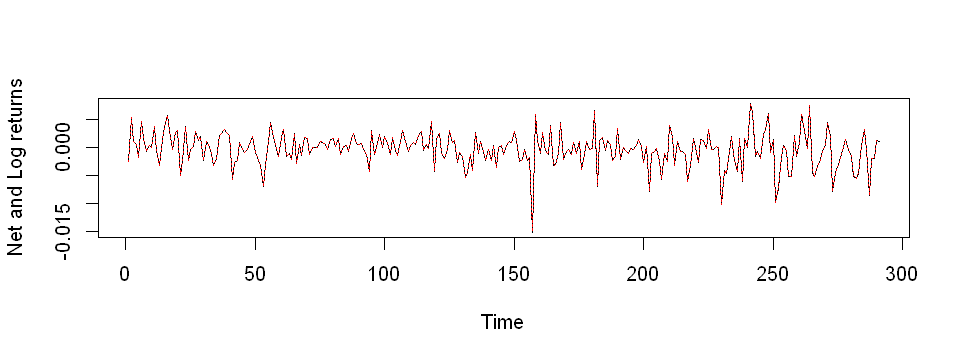

In [18]:
options(repr.plot.width=8, repr.plot.height=3)
    log.ret <- diff(log(series))
    ret <- diff(series)/series[-length(series)] #series[-length(series)] drops the last element of 'series'

    plot.ts(log.ret, ylab = "Net and Log returns")
    lines(ret, col = "red", lty = 3)

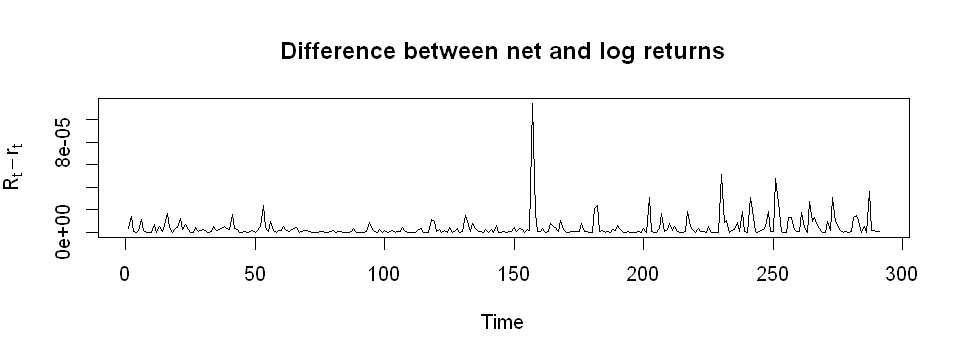

In [19]:
plot.ts(ret - log.ret, main = "Difference between net and log returns", ylab = expression(R[t] - r[t]))

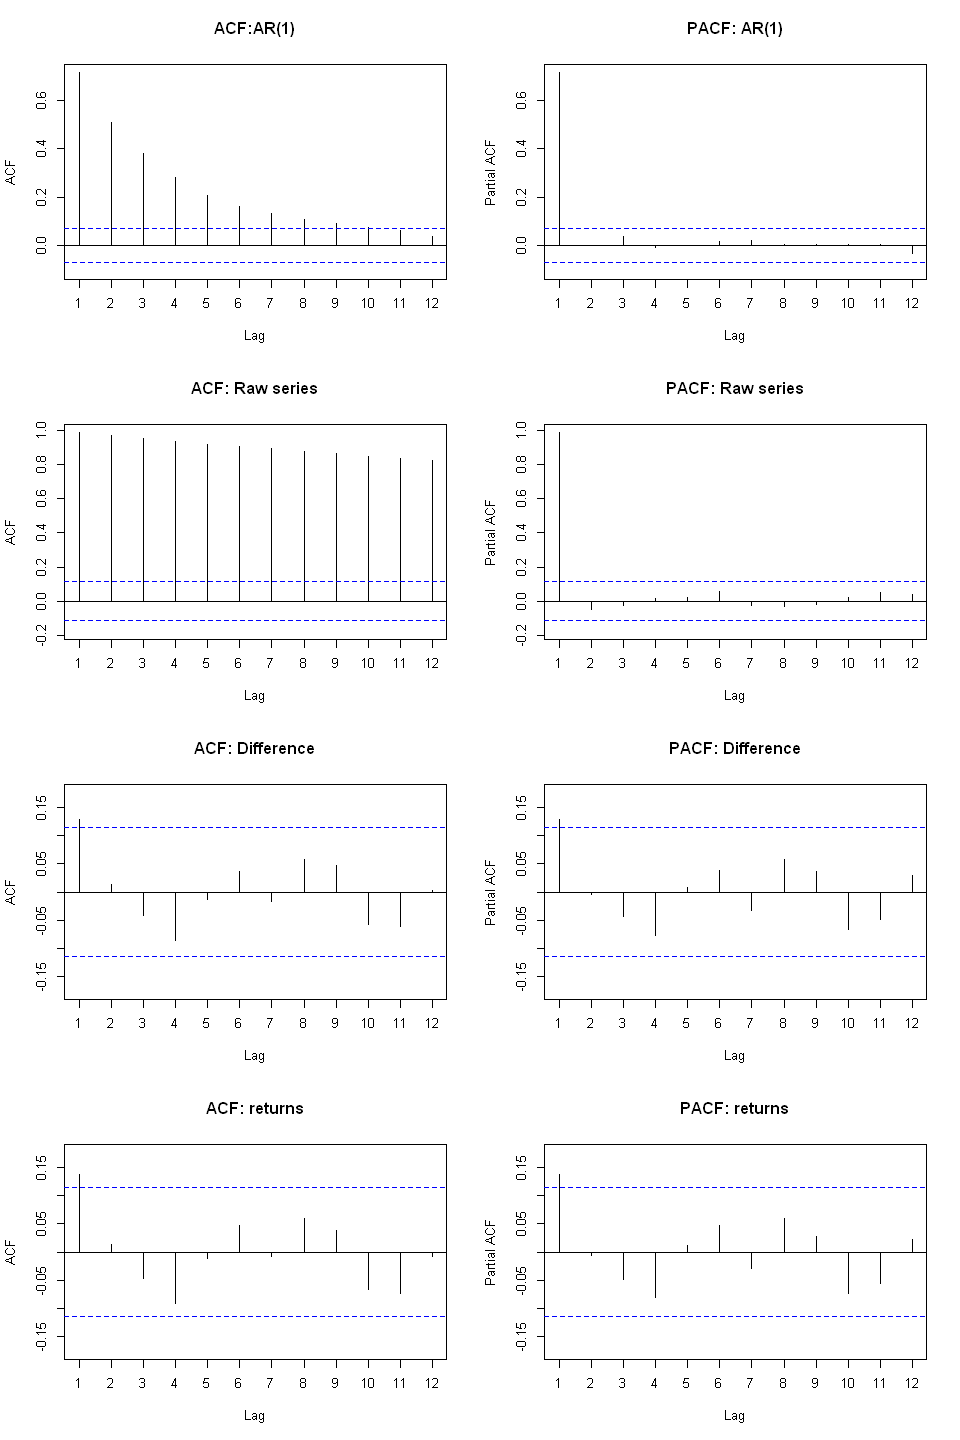

In [26]:
options(repr.plot.width=8, repr.plot.height=12)
par(mfrow=c(4,2))
    Acf(xx, lag.max = 12, main = "ACF:AR(1)")
    Pacf(xx, lag.max = 12, main = "PACF: AR(1)")

    Acf(series, lag.max = 12, main = "ACF: Raw series")
    Pacf(series, lag.max = 12, main = "PACF: Raw series")

    Acf(dif.series, lag.max = 12, main = "ACF: Difference")
    Pacf(dif.series, lag.max = 12, main = "PACF: Difference")

    Acf(returns, lag.max = 12, main = "ACF: returns")
    Pacf(returns, lag.max = 12, main = "PACF: returns")

In [19]:
adf.test(series)
adf.test(series, k = 1)


	Augmented Dickey-Fuller Test

data:  series
Dickey-Fuller = -1.2349, Lag order = 6, p-value = 0.8986
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  series
Dickey-Fuller = -1.8056, Lag order = 1, p-value = 0.6581
alternative hypothesis: stationary


In [27]:
adf.test(dif.series, k = 1)

Warning message in adf.test(dif.series, k = 1):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  dif.series
Dickey-Fuller = -11.646, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


In [28]:
kpss.test(series)

Warning message in kpss.test(series):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  series
KPSS Level = 3.7467, Truncation lag parameter = 5, p-value = 0.01


In [29]:
kpss.test(dif.series)

Warning message in kpss.test(dif.series):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  dif.series
KPSS Level = 0.82346, Truncation lag parameter = 5, p-value = 0.01


In [30]:
kpss.test(returns)

Warning message in kpss.test(returns):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  returns
KPSS Level = 0.84841, Truncation lag parameter = 5, p-value = 0.01


#### Contradicting results of ADF and KPSS tests
There may be a difference between the ADF and KPSS tests as they test different things (stationarity vs unit root).
Heteroskedasticity in a time series may make a big difference, and if there is a structural break, it will affect the inference 

(see https://stats.stackexchange.com/a/239367 for more details)


<font color='red'>Question:</font>
- Investigate power of the ADF test. Simulate 1000 times Gaussian white noise process of length 50 and look at the rejection rate at the 5% significance level.

In [26]:
# to suppress warnings you can use: suppressWarnings(function_with_unnecessary_warnings(params))

## Example 4. Real Data - PX50 index
<a id='Example4'></a>

In this example, we will look at the PX50 index.

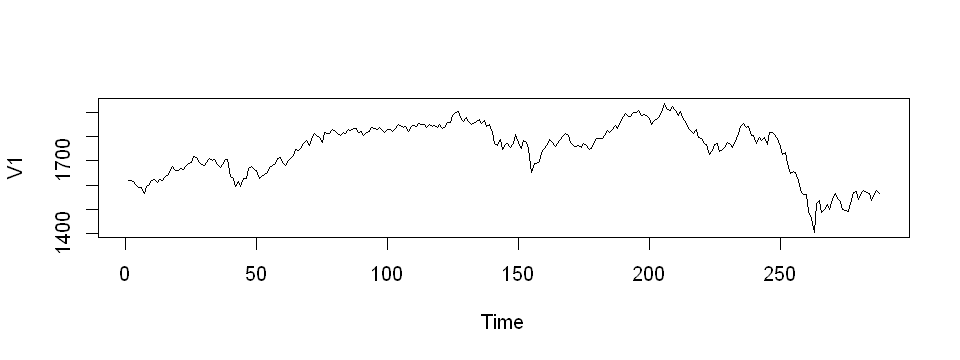

In [31]:
library('tseries')   #Time Series Analysis and Computational Finance 
library('forecast') #Forecasting Functions for Time Series and Linear Models 
library('repr') #Serializable Representations 

options(repr.plot.width=8, repr.plot.height=3)
data <- read.table("PX50_2007_2008.txt")
data <- as.matrix(data) 
plot.ts(data)

<font color='red'>Question:</font> 
Perform the basic analysis of the series by yourself.

- plot the time series, ACF and PACF
- stationarity?
- transformations? 


# Appendix 
<a id='Appendix'></a>

### Additional Resources
<a id='OptionalResources'></a>

- BOOK - Elements of time series econometrics: an applied approach by Evžen Kočenda and Alexandr Černý (chapter 3)
- Time Series Analysis and Computational Finance - https://cran.r-project.org/web/packages/tseries/tseries.pdf
- Forecasting Functions for Time Series and Linear Models - https://cran.r-project.org/web/packages/forecast/forecast.pdf
- Serializable Representations - https://cran.r-project.org/web/packages/repr/repr.pdf
- Stationarity in time series analysis -- https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322
- **BOOK** -- A weakly stationary process (page 208) -- [Brooks, C. Introductory Econometrics for Finance, Cambrige University Press.](https://drive.google.com/file/d/1fJ3O5rf-NFjwiJ0ptk1h91MKbCUb24xo/view?usp=sharing)
- set.seed() --  (1) http://rfunction.com/archives/62 ; (2) https://livefreeordichotomize.com/2018/01/22/a-set-seed-ggplot2-adventure/#:~:text=The%20set.,always%20get%20the%20same%20sample.
- Random Walk --  https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-random-walks-rw.html
- Dickey-Fuller test and ACF, PACF -  https://drive.google.com/file/d/1rWe7i-nriLpw9GLa9kzwkfF9qim0cd0G/view
- ACF and PACFs -- https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8 
- KPSS test -- (1) https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/#:~:text=The%20KPSS%20test%2C%20short%20for,spirit%20with%20the%20ADF%20test. ;  (2) https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-kpss.html (3) https://www.rdocumentation.org/packages/aTSA/versions/3.1.2/topics/kpss.test (4) https://www.rdocumentation.org/packages/tseries/versions/0.10-48/topics/kpss.test

### Two ways of generating Random Walk 
<a id='RandomWalk'></a>

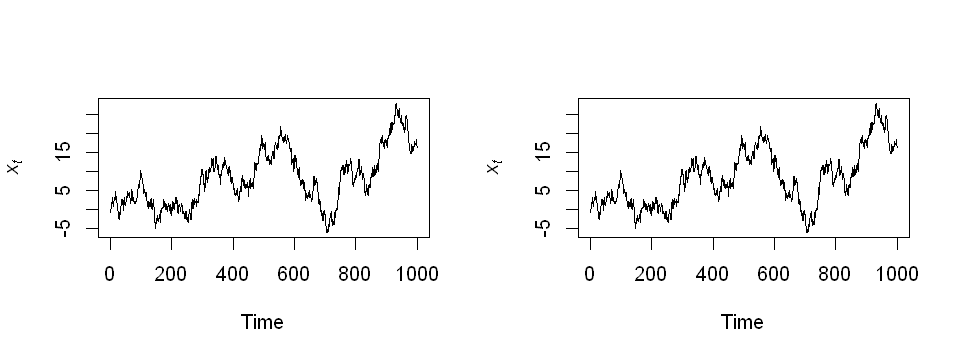

In [28]:
    ## set random number seed
        set.seed(123)
    ## length of time series
        TT <- 1000
    ## initialize {x_t} and {w_t}
        xx <- ww <- rnorm(n = TT, mean = 0, sd = 1)

#1=============================================
    ## compute values 2 thru TT
            a=1
        # x(t) = a*x(t-1) + w(t)
        for (t in 2:TT) {
            xx[t] <- a*xx[t - 1] + ww[t]
        }

#2=============================================
    ## however if we iterate RW regression backwards: 
        # x(t) = x(t-1) + w(t)
        # x(t-1) = x(t-2) + w(t-1)
        # x(t-2) = x(t-3) + w(t-2) .... 
    ## Plug in: 
        # x(t) = x(t-2) + w(t-1) + w(t)
        # x(t) = w(t) + w(t-1) + w(t-2) + w(t-3) + ...+ w(t-(t-2)) + w(t-(t-1)) + x(0)
        # x(t) = w(1) + w(2) + w(3) + ... +w(t)
    ##Thus, we can write is as the cummulative sum of w(t): 
        x2 <- cumsum(ww)
    ## setup plot area
        par(mfrow = c(1, 2))
    ## plot 1st RW
        plot.ts(xx, ylab = expression(italic(x[t])))
    ## plot 2nd RW
        plot.ts(x2, ylab = expression(italic(x[t])))